# Lab 9. Adnotacje na wykresach oraz formatowanie tabel danych w Jupyter notebook.

## 1. Adnotacje

Oprócz surowych danych oraz podstawowych informacji na obszarze wykresów takich jak legenda czy etykiety osi możemy również "dekorować" wykres dodatkowymi informacjami takimi jak linie, symbole czy tekst umieszczane we wskazanych miejscach wykresu. Umiejscowienie tych elementów zazwyczaj odbywa się w odniesieniu do wartości na obu osiach, ale może być również podane jako wartość bezwzględna, np. w postaci współrzędnych wyrażonych w pikselach.

### Do wykresu z przykładu 1 dodaj linię poziomą ciągłą o kolorze białym w miejscu wartości 0 na osi y, jeżeli w wektorze występują wartości mniejsze niż 0. Dodaj również linię poziomą przerywaną, umieszczając ją w miejscu wartości średniej dla osi y.

<AxesSubplot:>

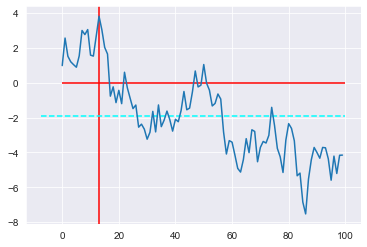

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# dane do wykresu
values = np.random.randn(100).cumsum()
# linia o "nieskończonej" długości
plt.axvline(np.argmax(values), color='r')
if values.min() < 0:
    # Czerwony zamiast białego, bo biały jest słabo widoczny
    plt.hlines(y=0, xmin=0, xmax=len(values), colors='red', linestyles='-')
plt.hlines(y=values.mean(), xmin=values.min(), xmax=len(values), colors='aqua', linestyles='--')
sns.lineplot(data=values)

### Do wykresu zaprezentowanego w przykładzie numer 2 dodaj strzałkę, która będzie wskazywała na najmniejszą wartość na wykresie.

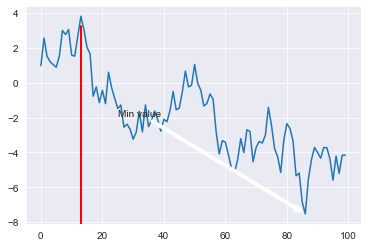

In [113]:
# zapisujemy obiekt wykresu do zmiennej
fig = sns.lineplot(data=values)
# w Seaborn możemy pobrać referencję do obiektu osi z obiektu wykresu
ax = fig.axes
# wartości maksymalne dla osi y, do wyznaczenia końca linii pionowej
ymin, ymax = ax.get_ylim()
# długość linii to wartość z przedziału [0,1], więc musimy wyliczyć punkt końca linii
ax.annotate("Min value",
            xy=(np.argmin(values), np.min(values)), xycoords='data',
            xytext=(len(values)/4, np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3", lw=4)
            );
end_point = (abs(np.min(values)) + abs(np.max(values))) / (abs(ymin) + abs(ymax))
plt.axvline(np.argmax(values), ymax=end_point, linewidth=2, color='r');

**Przykład 2 - obiekty graficzne**

Zazwyczaj będą to symbole w postaci strzałek, prostych obiektów geometrycznych, tekstu.
**Dokumentacja:**
* https://matplotlib.org/3.5.0/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html
* https://matplotlib.org/stable/gallery/index.html#text-labels-and-annotations

### Stwórz kopię wykresu z zadania 1, ale strzałkę dla wartości minimalnej umieszczaj tak, aby początek strzałki znajdował się z lewej strony, jeżeli wartość minimalna znajduje się w drugiej połowie wykresu, biorąc pod uwagę oś x, lub z prawej, jeżeli ta wartość znajduje się w pierwszej połowie. Dla strzałki ustaw wybrany styl linii zakrzywionej (angle).

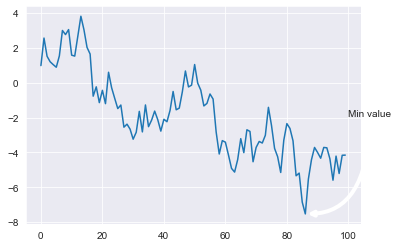

In [114]:
fig = sns.lineplot(data=values)
ax = fig.axes
ymin, ymax = ax.get_ylim()
if np.argmin(values) < np.mean(values):
    ax.annotate("Min value",
            xy=(np.argmin(values), np.min(values)), xycoords='data',
            xytext=(0, np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3", lw=4)
            );
else:
    ax.annotate("Min value",
            xy=(np.argmin(values), np.min(values)), xycoords='data',
            xytext=(100, np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3", lw=4)
            );
end_point = (abs(np.min(values)) + abs(np.max(values))) / (abs(ymin) + abs(ymax))

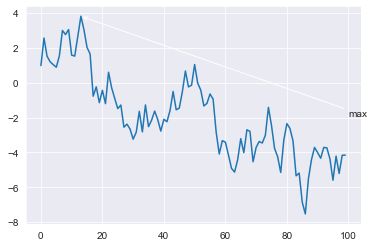

In [115]:
# zapisujemy obiekt wykresu do zmiennej
fig = sns.lineplot(data=values)

# w Seaborn możemy pobrać referencję do obiektu osi z obiektu wykresu
ax = fig.axes
# parametr xy określa współrzędne x1, y1 - tutaj punkt w który wskzuje grot strzałki
# parametr xytext to współrzędne x2, y2 - początek strzałki oraz położenie tekstu (opcjonalny)
# parametry xycoords oraz textcoords to informacja o tym, że współrzędne będą przekazywane jako wartości
# z danych (czyli 10 oznacza punkt, który reprezentuje wartość 10 na osi, a nie 10-element)
ax.annotate("max",
            xy=(np.argmax(values), np.max(values)), xycoords='data',
            xytext=(len(values), np.mean(values)), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),

            );

**Przykład 3 - wypełnienie obszaru**

Dokumentacja:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html#matplotlib.pyplot.fill_between


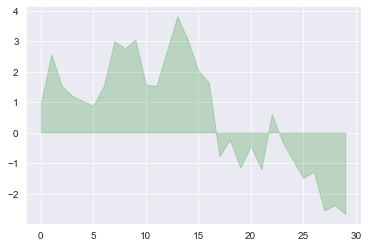

In [116]:
# x oraz y1 zawierają koordynaty, które zostaną wypełnione wskazanym kolorem
# oba wektory muszą być równoliczne
# tutaj pobieramy pierwsze 30 wartości całego zbioru
plt.fill_between(
        x = list(range(30)),
        y1 = values[:30],
        color= "g",
        alpha= 0.2)

### Bazując na przykładzie numer 3, stwórz wykres, na którym wartości większe od 0 będą wypełnione kolorem zielonym, a mniejsze czerwonym.

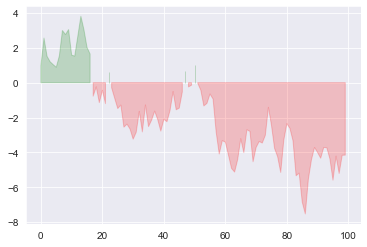

In [117]:
plt.fill_between(
        x = list(range(len(values))),
        y1 = values,
        where = (values > 0),
        color= "g",
        alpha= 0.2);
plt.fill_between(
        x = list(range(len(values))),
        y1 = values,
        where = (values < 0),
        color= "r",
        alpha= 0.2);

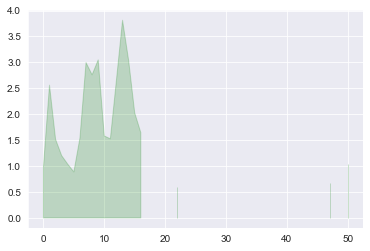

In [118]:
# tutaj kolorujemy dane dla całego wykresu, ale odfiltrowane dla wartości
# z wektora, które spełniają dany warunek (tablica bool)
plt.fill_between(
        x = list(range(len(values))),
        y1 = values,
        where = (values > 0),
        color= "g",
        alpha= 0.2);

# 2. Formatowanie ramek biblioteki pandas (Jupyter Notebook)
Oprócz możliwości wypisania ramki DataFrame w postaci dość przejrzyście sformatowanej ramki HTML możliwe jest określenie własnych styli oraz warunków formatowania takiego wyjścia.

> **UWAGA**: aktualnie nie wszystkie poniższe przykłady powodują widoczność odpowiedniego efektu dla zasosowanej wersji biblioteki. Rozwiązanie tego problemu zostanie przedstawione na kolejnych zajęciach (jeżeli twórcy biblioteki takie zapewnią).

**Przykład 4**

**Dokumentacja:**

* https://pandas.pydata.org/docs/user_guide/style.html
* https://www.analyticsvidhya.com/blog/2021/06/style-your-pandas-dataframe-and-make-it-stunning/
* https://coderzcolumn.com/tutorials/python/simple-guide-to-style-display-of-pandas-dataframes

In [119]:
df = pd.read_csv('data/pkn.txt')
df['<DATE>'] = pd.to_datetime(df['<DATE>'], format='%Y%m%d')
# mała transformacja pierwotnych danych, nazwy kolumn w postaci <NAZWA> powodowały
# niewłaściwe działanie przy opcjach związanych z formatowaniem
df.drop(columns=['<PER>', '<TIME>', '<OPENINT>'], inplace=True)
df.columns = [column.replace('<','').replace('>','') for column in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TICKER  5583 non-null   object        
 1   DATE    5583 non-null   datetime64[ns]
 2   OPEN    5583 non-null   float64       
 3   HIGH    5583 non-null   float64       
 4   LOW     5583 non-null   float64       
 5   CLOSE   5583 non-null   float64       
 6   VOL     5583 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 305.4+ KB


In [120]:
# dla potrzeb przykładu wybierzemy tylko niewielki wycinek danych
df10 = df[:10]
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   TICKER  10 non-null     object        
 1   DATE    10 non-null     datetime64[ns]
 2   OPEN    10 non-null     float64       
 3   HIGH    10 non-null     float64       
 4   LOW     10 non-null     float64       
 5   CLOSE   10 non-null     float64       
 6   VOL     10 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 688.0+ bytes


In [121]:
# przykład formatowania wyświetlanych wartości (tylko na wyjściu)
df10.style.format(precision=2
                  ,thousands=" "
                  ,formatter={'OPEN': lambda x: f"{x:,.2f} zł"})

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.27 zł,15.40,14.71,15.19,15 857 000
1,PKN,1999-11-29 00:00:00,15.12 zł,15.19,14.85,14.92,5 499 196
2,PKN,1999-11-30 00:00:00,15.06 zł,15.33,15.06,15.19,3 287 087
3,PKN,1999-12-01 00:00:00,15.33 zł,15.67,15.19,15.67,3 077 747
4,PKN,1999-12-02 00:00:00,15.82 zł,16.30,15.74,15.95,3 304 014
5,PKN,1999-12-03 00:00:00,15.95 zł,16.23,15.82,16.16,2 357 914
6,PKN,1999-12-06 00:00:00,16.30 zł,16.85,16.30,16.78,3 005 048
7,PKN,1999-12-07 00:00:00,16.71 zł,16.78,16.50,16.50,2 426 246
8,PKN,1999-12-08 00:00:00,16.50 zł,16.91,16.50,16.64,3 807 338
9,PKN,1999-12-09 00:00:00,16.64 zł,16.64,16.23,16.50,2 513 405


In [122]:
# formatowanie wartości maksymalnych w kolumnach
df10.style.highlight_max(color='green')

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


## Bazując na załączonych linkach do dokumentacji oraz przykładów formatowania ramek pandas wykonaj:

#### formatowanie tabeli z uwidocznieniem wartości w danym zakresie (between) dla wybranej kolumny

In [123]:
df10.style.highlight_between(subset='HIGH', left=15, right=16, axis=1, props='color:white; background-color:purple;')

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


#### formatowanie wartości w kolumnie volume, dopisując słowo sztuk na końcu

In [124]:
df['VOL'] = df['VOL'].apply(lambda row: str(row) + ' sztuk')
df

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26,15.268,15.403,14.715,15.194,15857000 sztuk
1,PKN,1999-11-29,15.124,15.194,14.852,14.923,5499196 sztuk
2,PKN,1999-11-30,15.060,15.330,15.060,15.194,3287087 sztuk
3,PKN,1999-12-01,15.330,15.674,15.194,15.674,3077747 sztuk
4,PKN,1999-12-02,15.818,16.297,15.745,15.954,3304014 sztuk
...,...,...,...,...,...,...,...
5578,PKN,2022-03-10,74.220,75.420,73.400,74.660,1292634 sztuk
5579,PKN,2022-03-11,74.660,77.800,74.200,77.600,1369221 sztuk
5580,PKN,2022-03-14,77.020,77.420,73.800,73.800,1759899 sztuk
5581,PKN,2022-03-15,74.200,75.740,73.400,75.000,1308018 sztuk


#### zastosuj dla wartości związanych z ceną wypełnienie gradientem

In [125]:
df10.style.background_gradient(cmap='Oranges', subset=['OPEN', 'HIGH', 'LOW', 'CLOSE'])

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


#### jak wyżej, ale w postaci pasków wartości (bar)

In [126]:
df10.style.bar(color='Lime', subset=['OPEN', 'HIGH', 'LOW', 'CLOSE'])

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


## Z podanych linków z przykładami wybierz 4 inne niż wyżej użyte formaty i je wyświetl.

#### Uwidocznienie linii oddzielających komórki

In [127]:
df10.style.set_properties(**{'border': '1.3px solid green',
                          'color': 'magenta'})

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


#### Podświetlenie kwartyli w przedziale (0.0-0.5)

In [128]:
df10.style.highlight_quantile(subset=['OPEN', 'HIGH', 'LOW', 'CLOSE'], q_left=0.0, q_right=0.5,
                            axis=0, props="border: 2px solid grey; background-color: black; color:white;")

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,15.403000,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,15.194000,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,15.330000,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,15.674000,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,16.297000,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,16.225000,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,16.847000,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,16.776000,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,16.911000,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,16.639000,16.225000,16.503000,2513405


#### Podświetlenie wartości null

In [129]:
# Dodanie wartości null dla pokazania efektów
df_null = df10.copy()
df_null['HIGH'] = df_null['HIGH'].apply(lambda row: np.nan)
df_null

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26,15.268,NaN,14.715,15.194,15857000
1,PKN,1999-11-29,15.124,NaN,14.852,14.923,5499196
2,PKN,1999-11-30,15.060,NaN,15.060,15.194,3287087
3,PKN,1999-12-01,15.330,NaN,15.194,15.674,3077747
4,PKN,1999-12-02,15.818,NaN,15.745,15.954,3304014
5,PKN,1999-12-03,15.954,NaN,15.818,16.159,2357914
6,PKN,1999-12-06,16.297,NaN,16.297,16.776,3005048
7,PKN,1999-12-07,16.711,NaN,16.503,16.503,2426246
8,PKN,1999-12-08,16.503,NaN,16.503,16.639,3807338
9,PKN,1999-12-09,16.639,NaN,16.225,16.503,2513405


In [130]:
df_null.style.set_na_rep("No value").highlight_null(null_color="orange")

C:\Users\Bartek\AppData\Local\Temp/ipykernel_7104/2348787015.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(na_rep=..)`
  df_null.style.set_na_rep("No value").highlight_null(null_color="orange")


,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.268000,No value,14.715000,15.194000,15857000
1,PKN,1999-11-29 00:00:00,15.124000,No value,14.852000,14.923000,5499196
2,PKN,1999-11-30 00:00:00,15.060000,No value,15.060000,15.194000,3287087
3,PKN,1999-12-01 00:00:00,15.330000,No value,15.194000,15.674000,3077747
4,PKN,1999-12-02 00:00:00,15.818000,No value,15.745000,15.954000,3304014
5,PKN,1999-12-03 00:00:00,15.954000,No value,15.818000,16.159000,2357914
6,PKN,1999-12-06 00:00:00,16.297000,No value,16.297000,16.776000,3005048
7,PKN,1999-12-07 00:00:00,16.711000,No value,16.503000,16.503000,2426246
8,PKN,1999-12-08 00:00:00,16.503000,No value,16.503000,16.639000,3807338
9,PKN,1999-12-09 00:00:00,16.639000,No value,16.225000,16.503000,2513405


#### Zaokrąglanie wartości do jednego miejsca po przecinku

In [131]:
df10.style.set_precision(1)

C:\Users\Bartek\AppData\Local\Temp/ipykernel_7104/866843453.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df10.style.set_precision(1)


,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,PKN,1999-11-26 00:00:00,15.3,15.4,14.7,15.2,15857000
1,PKN,1999-11-29 00:00:00,15.1,15.2,14.9,14.9,5499196
2,PKN,1999-11-30 00:00:00,15.1,15.3,15.1,15.2,3287087
3,PKN,1999-12-01 00:00:00,15.3,15.7,15.2,15.7,3077747
4,PKN,1999-12-02 00:00:00,15.8,16.3,15.7,16.0,3304014
5,PKN,1999-12-03 00:00:00,16.0,16.2,15.8,16.2,2357914
6,PKN,1999-12-06 00:00:00,16.3,16.8,16.3,16.8,3005048
7,PKN,1999-12-07 00:00:00,16.7,16.8,16.5,16.5,2426246
8,PKN,1999-12-08 00:00:00,16.5,16.9,16.5,16.6,3807338
9,PKN,1999-12-09 00:00:00,16.6,16.6,16.2,16.5,2513405
